In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [225]:
df_1 = pd.read_excel('../Data/Self assessment and Test Center.xlsx', engine='openpyxl')
df_2 = pd.read_excel('../Data/TS2018-2019_AISS.xlsx', engine='openpyxl')
df_3 = pd.read_excel('../Data/Variables and questions.xlsx', engine='openpyxl')

In [226]:
print(df_1.info)
# print(df_2.head())
# print(df_3.head())

<bound method DataFrame.info of                                        Id  lft_jr lft_cat  g  JO_team  Finals  \
0    014419E9-9730-41DC-8813-337E83118E63      12   11_12  1        0       0   
1    0373C5A4-0433-421D-81F5-F3D2C4B51251       7   00_08  0        0       0   
2    04D241B6-F1BB-4C48-8457-9F9127AE918C       8   00_08  0        0       0   
3    0578E3BC-DA4B-4B57-8D6A-F071804FFF2E      11   11_12  0        0       0   
4    06441EB7-3B47-453A-A71B-614B576B7215       8   00_08  1        0       0   
..                                    ...     ...     ... ..      ...     ...   
273  F678B02A-F941-4D03-833F-276BBBCE7475      10   09_10  0        0       0   
274  F9C7E58D-CDDC-494C-8124-BD07B97F5217       9   09_10  0        0       0   
275  FC06A844-0A2F-4027-BB6B-5D92B35951AC      10   09_10  0        0       0   
276  FE4BA400-8125-45A9-967C-5910D20824D4      12   11_12  0        0       0   
277  FECB0630-8FEE-4F4F-82D3-6F748A5E707E      11   11_12  0        0       0

In [227]:
# Calculating BMI from weight and height
# Formula : ( weight (kg) / height (cm) / height (cm) )x 10,000
df_1['bmi'] = ((df_1['X109_08']/df_1['X109_07']/df_1['X109_07'])*10000).round(2)

# Some rows for both weight and height have the value 0
df_1.loc[df_1['X109_07'] == 0]
df_1.loc[df_1['X109_08'] == 0]

# That results in some rows in bmi having the values 0 or inf
df_1['bmi'].head(10)

# We remove rows with the value 'inf'
df_1 = df_1[df_1['bmi'] != float("inf")]

In [228]:
# Getting rid of none necessary columns, which in our case are the nominal ones
numeric_columns = df_1.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
df_1 = df_1[numeric_columns]
print(df_1.head())

   lft_jr  g  JO_team  Finals  X01_01  X01_02  X01_03  X01_04  X01_05  X01_06  \
0      12  1        0       0       5       5       5       5       5       5   
1       7  0        0       0       4       4       4       5       5       5   
3      11  0        0       0       4       4       4       5       4       5   
4       8  1        0       0       1       5       5       5       5       5   
5       8  0        0       0       3       5       5       5       5       5   

   ...  X108_03  X108_04  X108_05  X109_01  X109_02  X109_04  X109_06  \
0  ...        0       71        1        3        3        3        1   
1  ...        0       56        4        4        1        1        1   
3  ...        2       51        1        3        5        4        4   
4  ...        3       56        1        2        3        3        4   
5  ...        0       66        5        5        3        5        3   

   X109_07  X109_08    bmi  
0      162     49.0  18.67  
1      145      

In [229]:
df_1.X108_04

0      71
1      56
3      51
4      56
5      66
       ..
273    81
274    75
275    78
276    61
277     0
Name: X108_04, Length: 275, dtype: int64

In [230]:
# Select the column to transform
column = df_1["X108_04"]

# Normalize the values in the column
min_value = column.min()
max_value = column.max()
normalized_column = (column - min_value) / (max_value - min_value)

# Transform the values to a Likert scale
likert_column = normalized_column * 5

# Round the values to the nearest integer
likert_column = np.round(likert_column)

# Replace the original column with the Likert scale column
df_1["X108_04"] = likert_column

In [231]:
df_1["X108_04"]

0      3.0
1      3.0
3      2.0
4      3.0
5      3.0
      ... 
273    4.0
274    3.0
275    4.0
276    3.0
277    0.0
Name: X108_04, Length: 275, dtype: float64

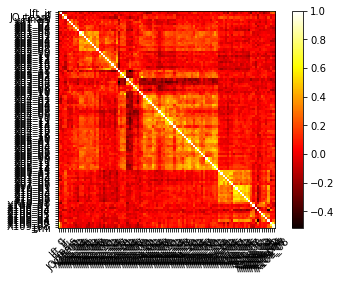

In [232]:
# Compute the correlation matrix
corr = df_1.corr()

# Plot the correlation matrix using a heatmap
plt.figure()
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_1.columns)), df_1.columns, rotation=45)
plt.yticks(range(len(df_1.columns)), df_1.columns)
plt.show()

In [249]:
corr

,lft_jr,g,JO_team,Finals,X01_01,X01_02,X01_03,X01_04,X01_05,X01_06,...,X108_03,X108_04,X108_05,X109_01,X109_02,X109_04,X109_06,X109_07,X109_08,bmi
lft_jr,1.000000,0.328159,-0.058770,-0.006069,0.107672,0.049196,0.097921,-0.062396,-0.064622,0.026393,...,0.010405,0.227358,-0.062498,0.038897,0.030029,0.069968,0.183397,0.799953,0.688292,0.490213
g,0.328159,1.000000,-0.065547,-0.087235,0.044580,0.067304,0.069905,0.048791,-0.027318,0.071883,...,-0.054447,0.046613,-0.088229,-0.053144,-0.203224,-0.114587,-0.066887,0.204885,0.258635,0.230562
JO_team,-0.058770,-0.065547,1.000000,0.334791,0.060121,0.051716,-0.001704,0.044841,0.056504,0.041377,...,0.014886,-0.159881,0.078128,0.009247,-0.015689,0.031175,0.032720,-0.037533,0.013992,0.030451
Finals,-0.006069,-0.087235,0.334791,1.000000,-0.054325,-0.050283,-0.032015,0.035978,-0.072960,0.102765,...,0.134997,-0.109445,0.077200,0.068542,0.042182,-0.043605,0.172023,-0.053828,0.059097,0.077064
X01_01,0.107672,0.044580,0.060121,-0.054325,1.000000,0.140912,0.308647,0.090244,0.152171,0.027591,...,0.053744,0.005233,-0.032247,0.017057,0.014585,-0.042857,0.049942,0.116047,0.023697,0.006335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X109_04,0.069968,-0.114587,0.031175,-0.043605,-0.042857,-0.087112,-0.061073,0.119710,0.105133,-0.032928,...,-0.011609,-0.042263,0.139656,0.271761,0.260721,1.000000,0.198155,0.069311,0.068111,0.069877
X109_06,0.183397,-0.066887,0.032720,0.172023,0.049942,0.041674,0.033432,0.053502,-0.021817,-0.024887,...,0.315275,-0.443014,-0.012048,0.262707,0.401917,0.198155,1.000000,0.024888,0.237994,0.273518
X109_07,0.799953,0.204885,-0.037533,-0.053828,0.116047,0.045897,0.137988,-0.087631,-0.072331,0.012246,...,-0.121497,0.332762,0.020358,0.095157,0.047811,0.069311,0.024888,1.000000,0.674930,0.367682
X109_08,0.688292,0.258635,0.013992,0.059097,0.023697,-0.014183,0.024076,-0.047296,-0.143070,-0.052134,...,0.029255,0.146033,0.022907,0.091455,0.065466,0.068111,0.237994,0.674930,1.000000,0.922061


# Removing rows with missing values

In [233]:
# Remove rows with missing values
df_1 = df_1.dropna()

In [234]:
df_1.info

<bound method DataFrame.info of      lft_jr  g  JO_team  Finals  X01_01  X01_02  X01_03  X01_04  X01_05  \
0        12  1        0       0       5       5       5       5       5   
1         7  0        0       0       4       4       4       5       5   
5         8  0        0       0       3       5       5       5       5   
6        15  0        0       1       2       4       4       5       5   
7        12  0        0       0       5       5       5       5       5   
..      ... ..      ...     ...     ...     ...     ...     ...     ...   
273      10  0        0       0       5       5       4       5       5   
274       9  0        0       0       5       5       5       5       5   
275      10  0        0       0       5       5       5       5       5   
276      12  0        0       0       5       5       5       5       5   
277      11  0        0       0       4       5       4       5       5   

     X01_06  ...  X108_03  X108_04  X108_05  X109_01  X109_02  X109

# Standardize the Data
PCA is affected by the scale, so we have to scale the features using. StandardScaler whcih will help us standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [235]:
pca = PCA(n_components = 0.95)
df_1_pca = pca.fit_transform(df_1)

print(len(df_1_pca))

258


In [236]:
print(pca.explained_variance_ratio_)

[0.73029593 0.14271851 0.01507565 0.00866052 0.00847391 0.00709649
 0.0052919  0.00420121 0.00361644 0.00356836 0.00318278 0.00300511
 0.00273467 0.00260261 0.00252977 0.00230722 0.00228115 0.00208498
 0.00199429]


## Spliting the dataframe into training and testing sets

In [277]:
from sklearn.model_selection import train_test_split

# Split the data into input and output variables
X = df_1.drop('Finals', axis=1)
y = df_1['Finals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applyinh logistic regression

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8461538461538461


/Users/gebruiker/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Applying KNN

In [279]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

# Training the model
neigh.fit(X_train, y_train)

# Make predictions on new data
y_pred = neigh.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8846153846153846


# Applying Naive Bayes

In [283]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Training the model
clf.fit(X_train, y_train)

# Make predictions on new data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8653846153846154
